# Catch that asteroid with poliastro!

![poliastro](img/logo_text.svg)

### Juan Luis Cano - 2021-09-24 @ Open Space SG

# Outline

1. Introduction
2. poliastro
3. Challenges
  - Validation
  - Performance & API design
  - Community building
4. How to contribute

# Who am I?

- **Aerospace Engineer** with a passion for orbits 🛰
- **Developer Advocate** at **Read the Docs** 🥑
  - Previously **Mission Planning & Execution Engineer** at **Satellogic** 🌍
- **Core developer** of **Astropy** and contributor to NumPy, SciPy, and others
- **Adjunct professor** of Python for Big Data at **IE** and **ESADE**
- Former chair of the **Python España** non profit and former co-organizer of **PyCon Spain** 🐍
- Free Software advocate and Python enthusiast 🕮

Follow me! https://github.com/astrojuanlu/

![Me!](img/juanlu_esa.jpg)

# Quick intro to Orbital Mechanics

### Physics → Mechanics → Celestial Mechanics → Orbital Mechanics

> A branch of Mechanics (itself a branch of Physics) that studies practical problems regarding the motion of rockets and other human-made objects through space

## But why do bodies orbit?

The long explanation for another day :) As a summary, let's visualize this experiment imagined by Newton:

<img src="img/newtons-cannonball.jpg" alt="Newton" width="400" ></img>

## If it's so simple, why all the fuss?

* Difficult to measure: these things move at around ~8 000 meters per second (Barcelona-Madrid in one minute) and GPS precision is not that good
* ...But great accuracy is required: we want to take pictures of specific places from 700 kilometers distance!
* Many perturbations: the Earth is not a sphere, the Moon is very close, the sunlight pushes the satellite (yes!)...
* If you lose contact with the satellite, it's a needle in a haystack

![Debris](img/debris.gif)

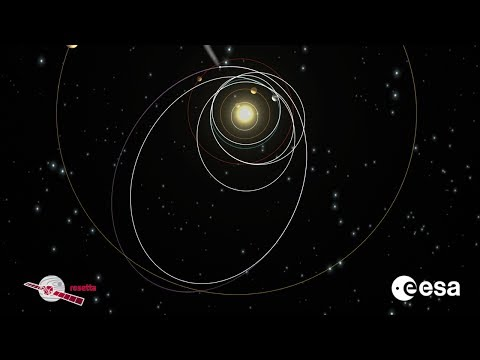

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("iEQuE5N3rwQ", width=800, height=600)

# Introduction to poliastro

<img src="img/logo_text.svg" alt="poliastro" width="500" style="float:right"></img>

> poliastro is a fast, easy to use Python library for interactive Astrodynamics and Orbital Mechanics.

* **Pure Python**, accelerated with **numba**
* **MIT license** (permissive)
* Physical units, astronomical scales and more, thanks to **Astropy**
* Conversion between several orbit representations
* Analytical and numerical propagation
* Cool documentation 🚀 https://docs.poliastro.space/
* Latest version 0.15.2 https://docs.poliastro.space/en/v0.15.2/changelog.html#poliastro-0-15-2-2021-06-27

<div style="clear:both"></div>

## Brief history

- *2013*: First version: Octave + FORTRAN + Python
- *2014*: Refactor of the API, much friendlier
- *2015*: Replace FORTRAN algorithms by Python + numba 🚀
- *2016*: Izzo algorithm (Lambert's problem), 6th ICATT @ ESA
- *2017*: Summer of Code in Space (SOCIS), OpenAstronomy & Astropy membership, 1st OSCW @ ESOC
- *2018*: Google Summer of Code (GSOC), #PyAstro18 @ Simons Fndn, expansion into the industry
- *2019*: Two students on GSOC, #PyAstro19 @ STScI + 3rd OSCW @ Athens, **Jorge joins the team**!
- *2020*: Another GSOC, NumFOCUS affiliation!
- *2021*: Event detection from GSOC, weekly community calls, ❓

### Orbit plotting

In [1]:
import warnings

from astropy import units as u
from astropy.time import Time

In [2]:
from poliastro.bodies import Earth
from poliastro.twobody import Orbit

In [3]:
# https://github.com/plotly/plotly.py/issues/1664#issuecomment-511773518
import plotly.graph_objects as go
import plotly.io as pio

# Set default renderer
pio.renderers.default = "plotly_mimetype+notebook_connected+jupyterlab"

# Set default template
pio.templates["slides"] = go.layout.Template(layout=dict(width=700, height=550))
pio.templates.default = "plotly+slides"

In [4]:
r = [-6045, -3490, 2500] * u.km
v = [-3.457, 6.618, 2.533] * u.km / u.s

ss = Orbit.from_vectors(Earth, r, v, Time.now())
ss

7283 x 10293 km x 153.2 deg (GCRS) orbit around Earth (♁) at epoch 2021-09-24 11:25:55.976954 (UTC)

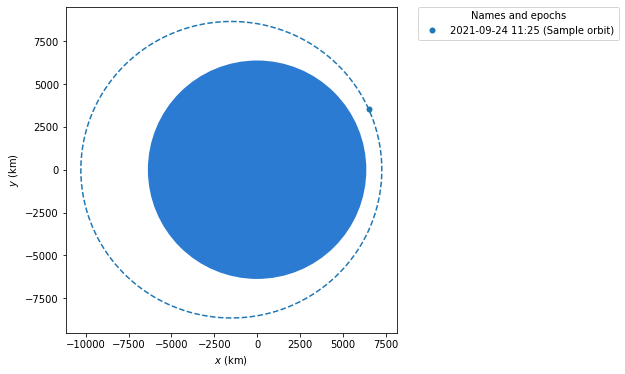

In [5]:
ss.plot(label="Sample orbit");

In [6]:
ss.plot(label="Sample orbit", interactive=True)

In [7]:
ss.plot(label="Sample orbit", use_3d=True, interactive=True)

### External data

* Planetary ephemerides
  - SPICE kernels
* Near Earth Objects (NEOs)
  - NeoWs https://api.nasa.gov/neo/?api_key=DEMO_KEY
  - DASTCOM5 database ftp://ssd.jpl.nasa.gov/pub/ssd/README.txt

In [8]:
from astropy.coordinates import solar_system_ephemeris
solar_system_ephemeris.set("jpl")

<ScienceState solar_system_ephemeris: 'jpl'>

In [18]:
from poliastro.ephem import Ephem
from poliastro.bodies import Sun

In [21]:
earth_ephem = Ephem.from_body(Earth, Time.now().tdb)
earth_ephem

Ephemerides at 1 epochs from 2021-09-24 11:28:49.412590 (TDB) to 2021-09-24 11:28:49.412590 (TDB)

In [22]:
Orbit.from_ephem(Sun, earth_ephem, earth_ephem.epochs[0])

1 x 1 AU x 23.4 deg (HCRS) orbit around Sun (☉) at epoch 2021-09-24 11:28:49.412590 (TDB)

In [26]:
florence = Orbit.from_sbdb("Florence")
florence

1 x 3 AU x 22.1 deg (HeliocentricEclipticIAU76) orbit around Sun (☉) at epoch 2459200.500800735 (TDB)

In [32]:
# Ephem.from_horizons("1P", Time.now().tdb)  # Fails, because there are several observations
halley_1835_ephem = Ephem.from_horizons("90000031", Time.now().tdb)
halley_1835 = Orbit.from_ephem(Sun, halley_1835_ephem, halley_1835_ephem.epochs[0])
halley_1835

1 x 35 AU x 159.5 deg (HCRS) orbit around Sun (☉) at epoch 2021-09-24 11:32:28.455476 (TDB)

In [40]:
import matplotlib.pyplot as plt

from poliastro.plotting.misc import plot_solar_system
from poliastro.bodies import Mercury, Venus, Earth, Mars

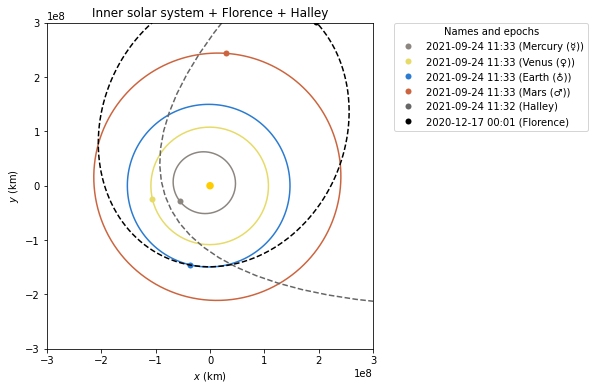

In [41]:
frame = plot_solar_system(epoch=Time.now().tdb, outer=False)

frame.plot(halley_1835, label='Halley', color='#666666')
frame.plot(florence, label='Florence', color='#000000')

plt.title("Inner solar system + Florence + Halley")
plt.xlim(-.3e9, .3e9)
plt.ylim(-.3e9, .3e9);

## Core algorithms

- Analytical propagation, aka Kepler's problem (*Battin universal variables approach*, *mean anomaly evolution*)
- Numerical propagation (*Cowell's method*)
- Boundary-value problem, aka Lambert's problem (*Vallado algorithm*, *Izzo algorithm with multiple revolution*)
- Orbital maneuvers (*Hohmann's transfer, bielliptic transfer*)

In [46]:
import numpy as np

from numba import njit

from poliastro.core.propagation import func_twobody
from poliastro.twobody.propagation import cowell


@njit
def accel(t0, state, k):
    """Constant acceleration aligned with the velocity. """
    v_vec = state[3:]
    norm_v = (v_vec * v_vec).sum() ** .5
    return 1e-5 * v_vec / norm_v


def f(t0, u_, k):
    du_kep = func_twobody(t0, u_, k)  # Keplerian acceleration
    ax, ay, az = accel(t0, u_, k)  # Perturbation acceleration
    du_ad = np.array([0, 0, 0, ax, ay, az])  # Assemble state vector
    return du_kep + du_ad  # Add perturbation acceleration components

In [47]:
r0 = [-2384.46, 5729.01, 3050.46] * u.km
v0 = [-7.36138, -2.98997, 1.64354] * u.km / u.s

initial = Orbit.from_vectors(Earth, r0, v0)

initial.propagate(3 * u.day, method=cowell, f=f)

18255 x 21848 km x 28.0 deg (GCRS) orbit around Earth (♁) at epoch J2000.008 (TT)

# Challenges

## Validation

> Unit testing a function with clear expectations is trivial. What are my expectations on numerical algorithms?

The wrooooooooooooooong way:

In [48]:
def sinc(x):
    return np.sin(x) / x

In [50]:
import pytest

In [51]:
@pytest.mark.parametrize("x", [0, 1, 10])
def test_sinc(x):
    assert sinc(x) == np.sin(x) / x

In [52]:
0.1 + 0.2 == 0.3

False

In [53]:
0.2 + 0.3 == 0.5

True

A better way:

* Compare against some authoritative source: **external data or software**
* Do floating point comparisons right and **use tolerances**
* Leverage advance features such as pytest **fixtures** and automatic test generation with hypotheses https://github.com/HypothesisWorks/hypothesis/

In [54]:
def test_convert_from_rv_to_coe():
    # Data from Vallado, example 2.6
    attractor = Earth
    p = 11067.790 * u.km
    ecc = 0.83285 * u.one
    inc = 87.87 * u.deg
    raan = 227.89 * u.deg
    argp = 53.38 * u.deg
    nu = 92.335 * u.deg
    expected_r = [6525.344, 6861.535, 6449.125] * u.km
    expected_v = [4.902276, 5.533124, -1.975709] * u.km / u.s

    r, v = ClassicalState(attractor, p, ecc, inc, raan, argp, nu).rv()

    assert_quantity_allclose(r, expected_r, rtol=1e-5)
    assert_quantity_allclose(v, expected_v, rtol=1e-5)

In [56]:
from functools import partial

from hypothesis import example, given, settings, strategies as st
import numpy as np

angles = partial(st.floats, min_value=-2 * np.pi, max_value=2 * np.pi)
eccentricities = partial(st.floats, min_value=0, max_value=1, exclude_max=True)

@st.composite
def with_units(draw, elements, unit):
    angle = draw(elements)
    return angle * unit

angles_q = partial(with_units, elements=angles(), unit=u.rad)
eccentricities_q = partial(with_units, elements=eccentricities(), unit=u.one)

In [57]:
@given(
    min_nu=angles_q(),
    ecc=eccentricities_q(),
    max_nu=st.one_of(angles_q(), st.none()),
)
def test_sample_closed_is_always_between_minus_pi_and_pi(min_nu, ecc, max_nu):
    result = sample_closed(min_nu, ecc, max_nu)

    assert ((-np.pi * u.rad <= result) & (result <= np.pi * u.rad)).all()

Still some issues:

* How much precision do you ask for? Should you carry a mathematical analysis?
* What if your results don't match? Sometimes, book or paper authors respond to your comments... And sometimes don't
* The changes in precision are a result of bad data, or worse algorithms?
* How do you even track _improvements_?

### External data (short summary)

* Nobody cares

* Those who care, don't share it

* Those who share, do it with 1 decimal place (true story)

* Those who share with 16 decimal places, don't describe how it was obtained (i.e. release the source)

* Those who release the source, make it impossible to compile

![Shrug](img/shrugging-guy.jpg)

### External software

* Sometimes commercial
* Is it validated itself? (See above)
* It is often difficult to reproduce the exact setting and algorithms, most of the times because your commercial software is much more complex

We are validating poliastro against Orekit and GMAT! https://github.com/poliastro/validation/

...If you're really interested, go read my Final Masters Project: https://github.com/juanlu001/pfc-uc3m

## Performance and API design

* We want to be **as user friendly as possible**
* This includes protecting the user from common mistakes
* Two annoying sources of errors: physical units and reference frames

![Mars Climate Orbiter](img/mco.png)

* But performance comes at a price
* _Yes, Python is slow_ (compared to compiled languages)
* The places where we don't notice it is because the underlying code is compiled (e.g. NumPy)

Then, how to accelerate the code?

## Vectorization

* Rewriting some code leveraging high level NumPy functions can make it way faster
* However, this works best for array manipulation - some other algorithms cannot easily be vectorized
* And even if you can, vectorized code can be impossible to read

![Too smart](img/too_smart.png)

## Cython

![Cython](img/Cython-logo.png)

* Mature, widely used, effective, gradual - a great project!
* Some personal problems with it:
  - I don't know any C, so it's more difficult for me
  - I wanted poliastro to be super easy to install by avoiding the "two language" problem (this includes Windows)
  - The native debugger is broken https://github.com/Juanlu001/cython-rasterio-debugging/issues/2
  - I really don't want to worry about some gore details

I don't have lots of experience with it, so I don't have solid arguments against it.

## PyPy

![PyPy](img/pypy-logo.png)

* PyPy is a super interesting alternative Python implementation https://pypy.org/
* I really really want to use it more, but there are some obstacles:
  - The documentation is a bit poor, even the changelogs
  - Lacks interest from the mainstream community (including snarky comments by Guido about "nobody using it in production")
  - Support in conda is half-broken https://github.com/conda-forge/pypy2.7-feedstock/issues/1
  - PyPy has several incompatibilities with manylinux1 wheels https://bitbucket.org/pypy/pypy/issues/2617/
  - manylinux2010 are almost there, but need the final push https://github.com/pypa/manylinux/issues/179

## numba

![numba](img/numba-logo.png)

* numba is a Python-to-LLVM JIT compiler
* When it works, it's super effective and the results are impressive!
* Debugging improved _a lot_ lately
* However, its focus is numerical code: it won't accelerate high level Python features
* At the moment it's not even possible to pass a function as an argument, impeding reusability https://github.com/numba/numba/issues/2952

In [58]:
import random

In [59]:
def monte_carlo_pi(nsamples):
    acc = 0
    for ii in range(nsamples):
        x = random.random()
        y = random.random()
        if x ** 2 + y ** 2 < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [60]:
print(monte_carlo_pi(10))
print(monte_carlo_pi(1_000_000))

2.4
3.139744


In [61]:
%timeit monte_carlo_pi(1_000_000)

208 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
from numba import njit  # Forget about jit! Only nopython mode

fast_monte_carlo_pi = njit(monte_carlo_pi)

In [24]:
%timeit -n1 -r1 fast_monte_carlo_pi(1_000_000)

144 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [25]:
%timeit fast_monte_carlo_pi(1_000_000)

10.9 ms ± 235 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
from numba import jit

@jit(nopython=False)
def monte_carlo_pi(nsamples):
    acc = 0
    for ii in range(nsamples):
        x = random.random()
        y = random.random()
        if x ** 2 + y ** 2 < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

print(monte_carlo_pi(1_000_000))
print(monte_carlo_pi.inspect_types(pretty=True))

3.141976
Function name: monte_carlo_pi
In file: /tmp/ipykernel_16763/2077501029.py
With signature: (int64,) -> float64

3: @jit(nopython=False)
4: def monte_carlo_pi(nsamples):
5:     acc = 0
--        label 0
--          nsamples = arg(0, name=nsamples)  :: int64
--          acc = const(int, 0)  :: Literal[int](0)
6:     for ii in range(nsamples):
--          $6load_global.1 = global(range: <class 'range'>)  :: Function(<class 'range'>)
--          $10call_function.3 = call $6load_global.1(nsamples, func=$6load_global.1, args=[Var(nsamples, 2077501029.py:5)], kws=(), vararg=None, target=None)  :: (int64,) -> range_state_int64
--          del $6load_global.1
--          $12get_iter.4 = getiter(value=$10call_function.3)  :: range_iter_int64
--          del $10call_function.3
--          $phi14.0 = $12get_iter.4  :: range_iter_int64
--          del $12get_iter.4
--          jump 14
--        label 14
--          $14for_iter.1 = iternext(value=$phi14.0)  :: pair<int64, bool>
--          $

## Solution

So... let's make our code Fortran-esque!

<img src="img/architecture.svg" alt="Architecture" width="500" style="float:right"></img>

High level API:

* Supports mixed units and time scales, figures out the rest
* Easy to use and impossible to get wrong
* **Slow**

Dangerous™ algorithms:

* **Fast** (easy to accelerate with numba or Cython)
* Only cares about numbers, makes assumptions on units (SI, TBD)
* **You can mess it up**

<div style="clear:both"></div>

In [65]:
@u.quantity_input(E=u.rad, ecc=u.one)
def E_to_nu(E, ecc):
    """True anomaly from eccentric anomaly."""
    return (E_to_nu_fast(E.to(u.rad).value, ecc.value) * u.rad).to(E.unit)

### Measure everything!

https://benchmarks.poliastro.space/

![Benchmarks](img/benchmarks.png)

## Community building

> I believe the choice of license is an important one, and I advocate a BSD-style license. **In my experience, the most important commodity an open source project needs to succeed is users.**
>
> -- John Hunter † http://nipy.org/nipy/faq/johns_bsd_pitch.html

* Sometimes, language wins over performance.
* Sometimes, documentation wins over features.
* Sometimes, marketing wins over quality.

_Go find your users!_

# How to contribute?

* First and foremost: **no astrodynamics knowledge required!**
* Lots of issues with plotting, testing, internal design...
* Everything that fits de scope https://github.com/poliastro/poliastro#can-i-do-insert-awesome-thing-with-poliastro and is aligned with the vision https://github.com/poliastro/poliastro/wiki/Core-principles is welcome!
* If you use the library and find bugs or outdated docs, we would love to know!
* And if you do something cool, we can publish a success story https://docs.poliastro.space/en/stable/#success-stories
* Comment on issues, join our chat, let's talk!

# _Per Python ad astra!_ 🚀

* Slides: https://github.com/poliastro/long-talk
* poliastro chat: http://chat.poliastro.space
* Twitter: https://twitter.com/poliastro_py

## Terima kasih banyak - banyak!

![Rocket](img/soyuz.jpg)